##### Steps 


# 1.Reading and understanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [4]:
#reading the data
inp0=pd.read_csv("day.csv")

In [5]:
inp0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
inp0.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Number of rows and columns
inp0.shape

(730, 16)

In [7]:

inp0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#checking null values
inp0.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#dropping instant and dteday columns
inp0.drop(["instant","dteday"],axis=1,inplace=True)

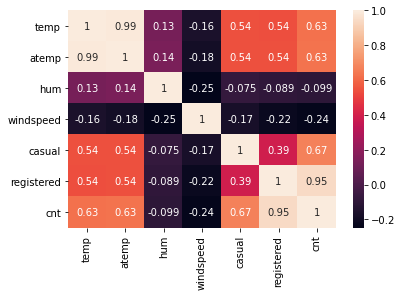

In [10]:
#correlation between numerical variables.

Correl=inp0[["temp","atemp","hum","windspeed","casual","registered","cnt"]].copy()
sns.heatmap(Correl.corr(),annot=True)
plt.show()


#### we found  multicollinearity between temp - atemp ,so we are going to drop atemp column
#### also cnt = casual +registered so we are going to drop casual and registered
 

In [11]:
inp0.drop(["atemp","registered","casual"],axis=1,inplace=True)

In [12]:
inp0.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [13]:
inp0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


#### handling categorical variables


In [14]:
#changing objects to weathersit column for the purpose of assigning dummies
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
inp0.loc[(inp0["weathersit"]==1),"weathersit"] = "A"
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
inp0.loc[(inp0["weathersit"]==2),"weathersit"] = "B"
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
inp0.loc[(inp0["weathersit"]==3),"weathersit"] = "C"
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
inp0.loc[(inp0["weathersit"]==4),"weathersit"] = "D"

In [15]:
inp0.weathersit.astype("category").value_counts()


A    463
B    246
C     21
Name: weathersit, dtype: int64

In [16]:
inp0.weathersit.unique()

array(['B', 'A', 'C'], dtype=object)

In [17]:
#season (1:spring, 2:summer, 3:fall, 4:winter)
inp0.loc[(inp0["season"]==1),"season"] = "spring"
inp0.loc[(inp0["season"]==2),"season"] = "summer"
inp0.loc[(inp0["season"]==3),"season"] = "fall"
inp0.loc[(inp0["season"]==4),"season"] = "winter"

In [18]:
inp0.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [19]:
inp0.season.astype("category").value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [20]:
#mnth : month ( 1 to 12)
inp0.loc[(inp0["mnth"]==1),"mnth"] = "Jan"
inp0.loc[(inp0["mnth"]==2),"mnth"] = "Feb"
inp0.loc[(inp0["mnth"]==3),"mnth"] = "Mar"
inp0.loc[(inp0["mnth"]==4),"mnth"] = "Apr"
inp0.loc[(inp0["mnth"]==5),"mnth"] = "May"
inp0.loc[(inp0["mnth"]==6),"mnth"] = "Jun"
inp0.loc[(inp0["mnth"]==7),"mnth"] = "Jul"
inp0.loc[(inp0["mnth"]==8),"mnth"] = "Aug"
inp0.loc[(inp0["mnth"]==9),"mnth"] = "Sep"
inp0.loc[(inp0["mnth"]==10),"mnth"] = "Oct"
inp0.loc[(inp0["mnth"]==11),"mnth"] = "Nov"
inp0.loc[(inp0["mnth"]==12),"mnth"] = "Dec"


In [21]:
inp0.mnth.astype("category").value_counts()

Oct    62
May    62
Mar    62
Jul    62
Jan    62
Dec    62
Aug    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [22]:
#weekday : day of the week
inp0.loc[(inp0["weekday"]==0),"weekday"] = "Sun"
inp0.loc[(inp0["weekday"]==1),"weekday"] = "Mon"
inp0.loc[(inp0["weekday"]==2),"weekday"] = "Tue"
inp0.loc[(inp0["weekday"]==3),"weekday"] = "Wed"
inp0.loc[(inp0["weekday"]==4),"weekday"] = "Thu"
inp0.loc[(inp0["weekday"]==5),"weekday"] = "Fri"
inp0.loc[(inp0["weekday"]==6),"weekday"] = "Sat"

In [23]:
inp0.weekday.astype("category").value_counts()

Tue    105
Mon    105
Wed    104
Thu    104
Sun    104
Sat    104
Fri    104
Name: weekday, dtype: int64

In [24]:
inp0.weekday.unique()

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype=object)

### 2.Visualising the data

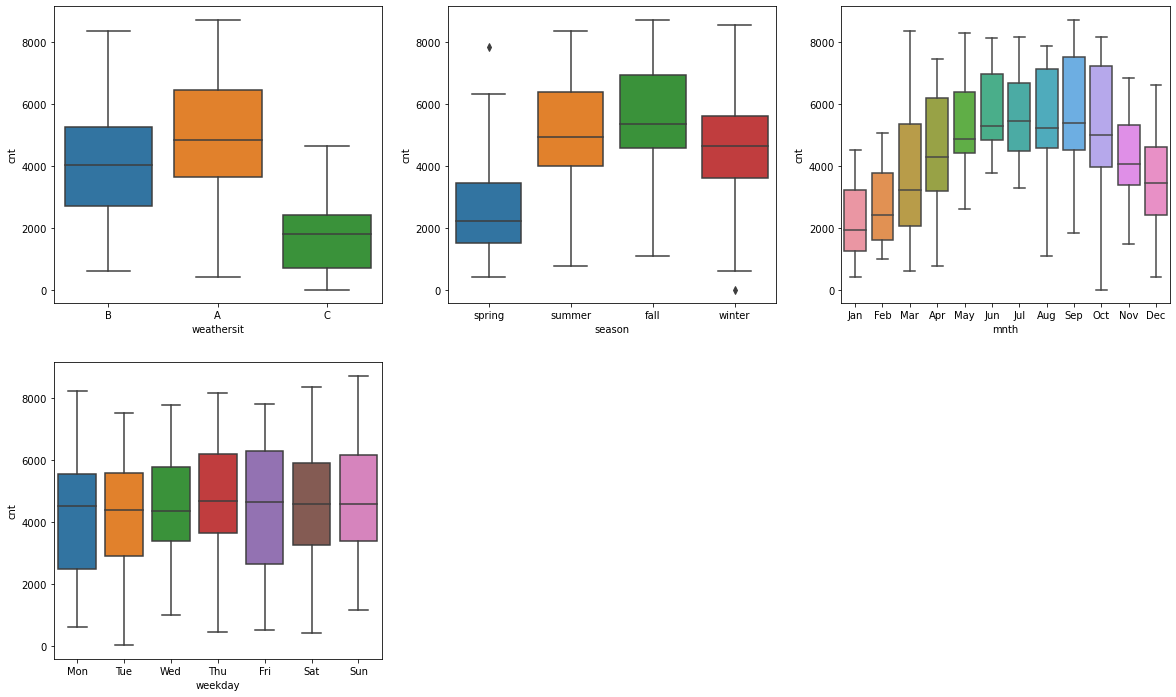

In [25]:
#Visualising categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = inp0)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = inp0)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = inp0)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = inp0)
plt.show()

Inferences for above box plot:

1.average count of bikes is high in category A which is Clear, Few clouds, Partly cloudy, Partly cloudy 

2.People share more bikes fall season and summer season

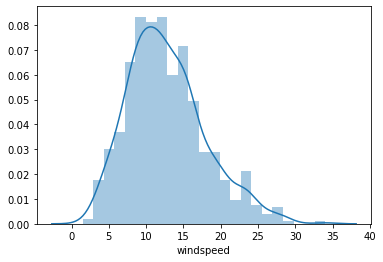

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.distplot(inp0['windspeed'])

In [27]:
print(inp0['windspeed'].skew())

0.6763140387852972


In [28]:
transformed=np.log10(inp0['windspeed'])

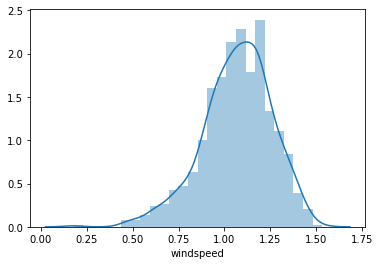

In [29]:
sns.distplot(transformed)

-0.5807160633954186


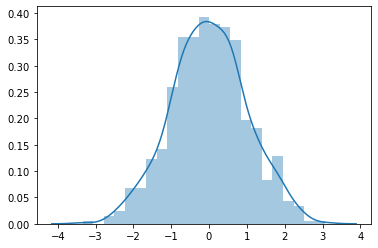

In [30]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
tranformed = pt.fit_transform(inp0[['windspeed']])
sns.distplot(tranformed)
print(transformed.skew())

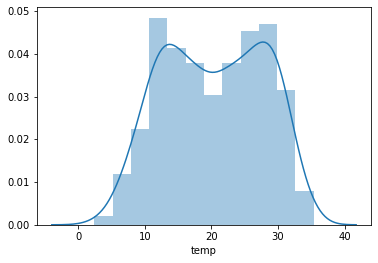

In [31]:

sns.distplot(inp0.temp)
plt.show()

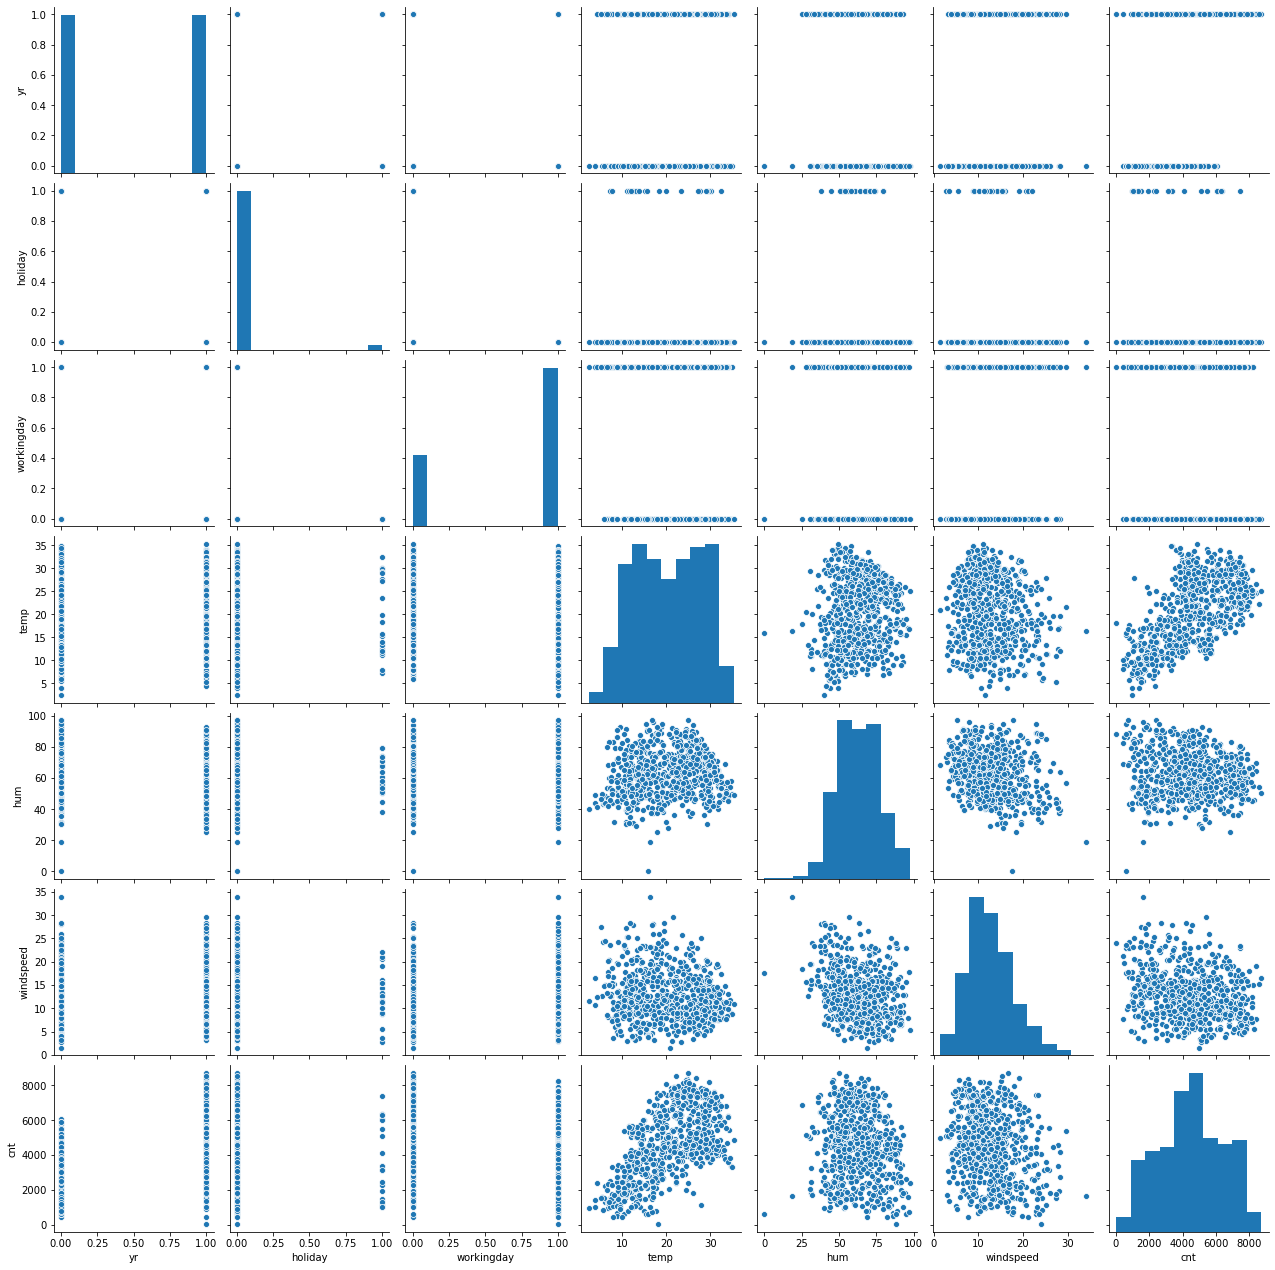

In [32]:
#Visualising numerical columns
inp0_numerical= inp0[["temp","hum","windspeed","cnt"]].copy()
sns.pairplot(inp0)
plt.show()

## 3.Data preparation

### Dummy Variables


In [33]:
inp0_categorical=inp0[["weathersit","season","mnth","weekday"]]

In [34]:
inp0_dummies=pd.get_dummies(inp0_categorical,drop_first=True)

In [35]:
inp0_dummies.head()

,weathersit_B,weathersit_C,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
inp0=inp0.drop(list(inp0_categorical.columns),axis=1)

In [37]:
inp0=pd.concat([inp0,inp0_dummies],axis=1)

In [38]:
inp0.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_B,weathersit_C,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,0,0,0



## Step 4: Splitting the Data into Training and Testing Sets



In [39]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(inp0, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features


In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [43]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_B,weathersit_C,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.343137,0.029412,0.243137,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.475223,0.169124,0.429398,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


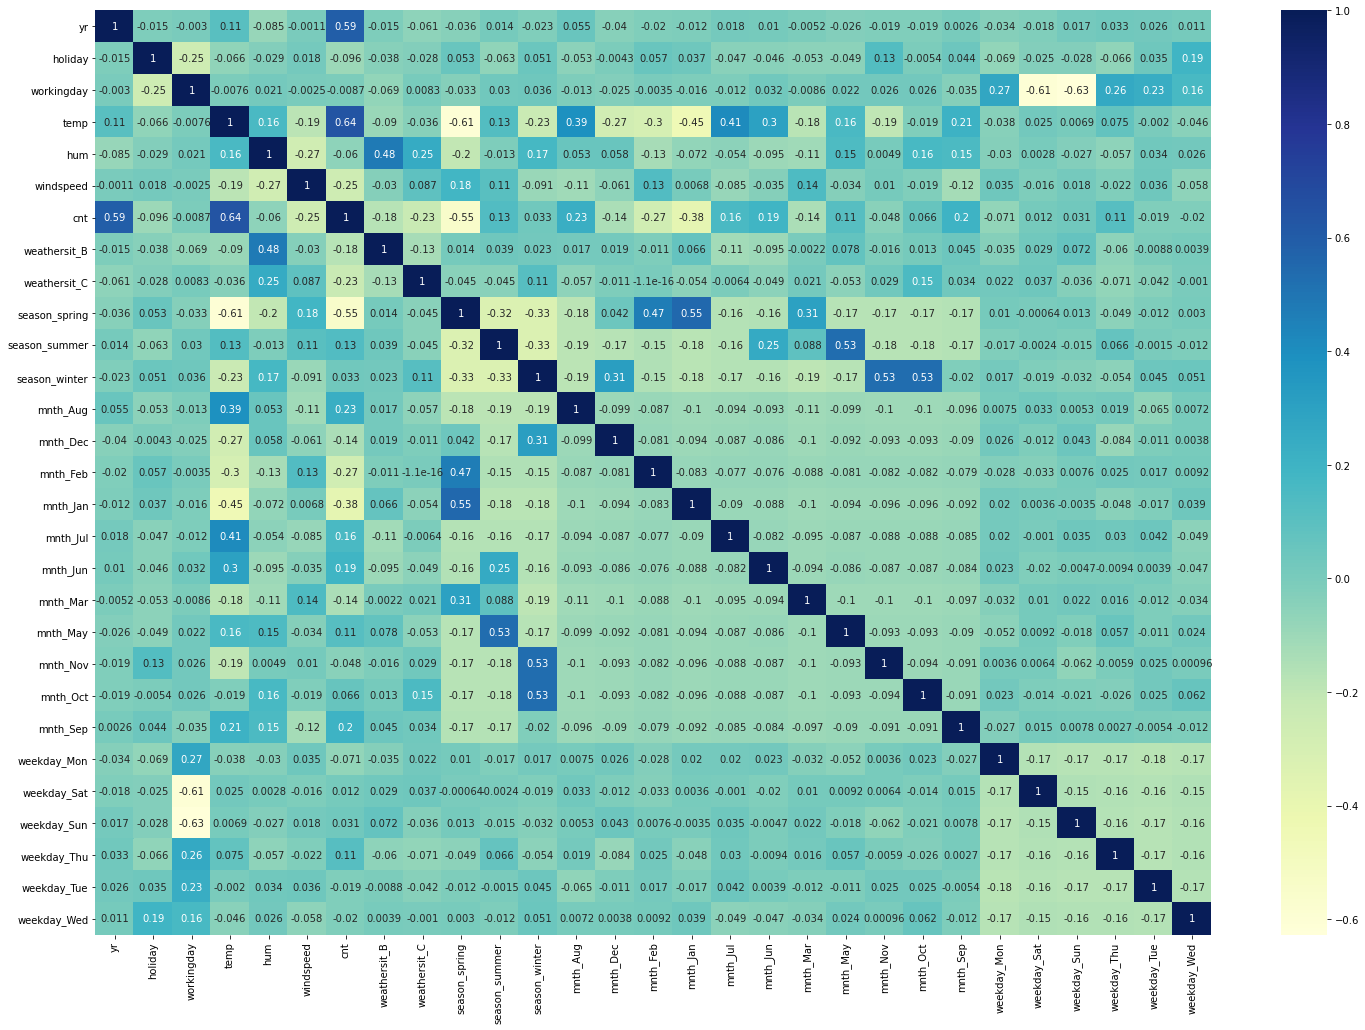

In [44]:
plt.figure(figsize = (25, 17))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observations:

Temperature is highly correlated with cnt.

Windspeed is negatively correlated with cnt means when windspeed is lower people prefer bikes



Lets plot scatter plot to see  correlation between temp cnt

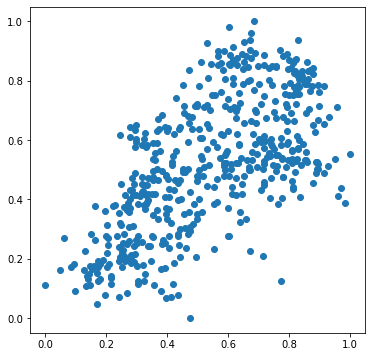

In [45]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building


In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model


In [47]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [48]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

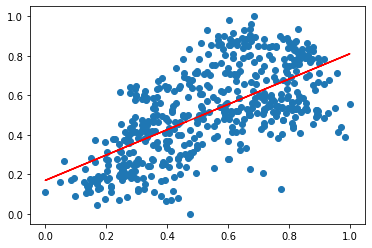

In [49]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.170 + 0.640*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [50]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           5.80e-61
Time:                        05:32:05   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable


In [51]:
X_train_lm = X_train[['temp', 'yr']]

In [52]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [53]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          9.25e-130
Time:                        05:32:15   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

In [54]:
X_train_lm = X_train[['temp', 'yr','mnth_Aug']]
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const       0.074968
temp        0.596699
yr          0.237419
mnth_Aug   -0.026061
dtype: float64

In [55]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     377.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.10e-128
Time:                        05:32:21   Log-Likelihood:                 338.20
No. Observations:                 510   AIC:                            -668.4
Df Residuals:                     506   BIC:                            -651.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.015      4.878      0.0

There was little effect of adding mnth_aug,so its not very significant

### Adding all the variables

In [56]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            0.394543
yr               0.230857
holiday         -0.135424
workingday      -0.060524
temp             0.445458
hum             -0.157315
windspeed       -0.183046
weathersit_B    -0.059355
weathersit_C    -0.251511
season_spring   -0.043705
season_summer    0.042243
season_winter    0.110897
mnth_Aug         0.021507
mnth_Dec        -0.045669
mnth_Feb        -0.037279
mnth_Jan        -0.063612
mnth_Jul        -0.034910
mnth_Jun         0.000975
mnth_Mar         0.000608
mnth_May         0.024064
mnth_Nov        -0.041555
mnth_Oct         0.005790
mnth_Sep         0.086055
weekday_Mon     -0.024633
weekday_Sat     -0.056319
weekday_Sun     -0.049961
weekday_Thu      0.003863
weekday_Tue     -0.026299
weekday_Wed     -0.011241
dtype: float64

In [57]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.33e-179
Time:                        05:32:29   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3945      0.085      4.640

### Model Building using RFE

In [58]:
from sklearn.feature_selection import RFE

lm = LinearRegression()

rfe1 = RFE(lm,15)

rfe1.fit(X_train,y_train)

print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True  True  True  True  True  True  True  True False
  True False  True  True False False False  True False  True False False
 False False False False]
[ 1  1  3  1  1  1  1  1  1  1  1  9  1  2  1  1 13 14  6  1 11  1  8  4
  5 12  7 10]


In [59]:
rfe1.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False])

In [60]:
import statsmodels.api as sm

col1 = X_train.columns[rfe1.support_]

X_train_rfe1=X_train[col1]

X_train_rfe1 = sm.add_constant(X_train_rfe1)

X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,weathersit_B,weathersit_C,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,0,0,1,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,1,0,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0


In [61]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        05:32:45   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886

## VIF

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
8,season_spring,5.27
3,temp,4.42
10,season_winter,3.83
9,season_summer,2.76
4,hum,1.93
14,mnth_Nov,1.76
12,mnth_Jan,1.68
6,weathersit_B,1.57
11,mnth_Dec,1.49


In [64]:
#RFE using 7 variables
from sklearn.feature_selection import RFE

lm = LinearRegression()

rfe2 = RFE(lm,7)

rfe2.fit(X_train,y_train)

print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True  True  True  True  True  True  True  True False
  True False  True  True False False False  True False  True False False
 False False False False]
[ 1  1  3  1  1  1  1  1  1  1  1  9  1  2  1  1 13 14  6  1 11  1  8  4
  5 12  7 10]


In [65]:
import statsmodels.api as sm

col2 = X_train.columns[rfe2.support_]

X_train_rfe2=X_train[col2]

X_train_rfe2 = sm.add_constant(X_train_rfe2)

X_train_rfe2.head()

,const,yr,temp,hum,windspeed,weathersit_C,season_spring,mnth_Jul
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,0,1
426,1.0,1,0.442393,0.640189,0.255342,0,1,0
728,1.0,1,0.245101,0.498067,0.663106,0,1,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0


In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.45
2,temp,1.95
6,season_spring,1.64
7,mnth_Jul,1.25
3,hum,1.23
4,windspeed,1.14
5,weathersit_C,1.10
1,yr,1.03


In [67]:
X=X_train_rfe2.drop("const",axis=1)

In [68]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
5,season_spring,1.80
6,mnth_Jul,1.35
4,weathersit_C,1.11


In [69]:
X_train_lm = sm.add_constant(X)

lr_2= sm.OLS(y_train, X_train_rfe2).fit()

In [858]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.34e-178
Time:                        05:21:41   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348

In [70]:
X.drop("hum",axis=1,inplace=True)

In [71]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
4,season_spring,1.49
5,mnth_Jul,1.26
3,weathersit_C,1.04


In [72]:
X_train_lm = sm.add_constant(X)

lr_3= sm.OLS(y_train, X_train_rfe2).fit()

In [73]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.34e-178
Time:                        05:33:35   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348

In [74]:
X.head()

,yr,temp,windspeed,weathersit_C,season_spring,mnth_Jul
653,1,0.509887,0.300794,0,0,0
576,1,0.815169,0.264686,0,0,1
426,1,0.442393,0.255342,0,1,0
728,1,0.245101,0.663106,0,1,0
482,1,0.395666,0.188475,0,0,0


#### Now VIF looks good and adjusted R2 is 83.4 with 13 feature

## Step 6: Residual Analysis of the train data


In [75]:
y_train_cnt = lr_3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

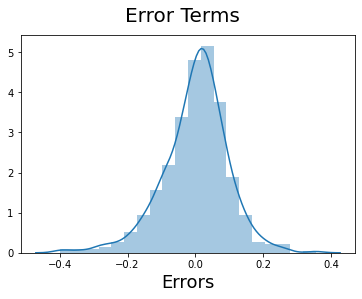

In [76]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Step 7: Making Predictions Using the Final Model


In [865]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

In [77]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [78]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_B,weathersit_C,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.319635,0.027397,0.255708,...,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.467403,0.163612,0.437258,...,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,weathersit_B,weathersit_C,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
184,0,1,0,0.831783,0.657364,0.084219,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.837699,0.334206,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [89]:
X_test_m5 = sm.add_constant(X_test)

In [90]:
temp = ["const","yr","temp","windspeed","hum","weathersit_C","season_spring","mnth_Jul"]

In [91]:
X_test_m5 = X_test_m5[list(temp)]

In [92]:
X_test_m5.head()

,const,yr,temp,windspeed,hum,weathersit_C,season_spring,mnth_Jul
184,1.0,0,0.831783,0.084219,0.657364,0,0,1
535,1.0,1,0.901354,0.153728,0.610133,0,0,0
299,1.0,0,0.511964,0.334206,0.837699,0,0,0
221,1.0,0,0.881625,0.339570,0.437098,0,0,0
152,1.0,0,0.817246,0.537414,0.314298,0,0,0


In [93]:
y_pred_m4 = lr_3.predict(X_test_m5)

### Model Evaluation


Text(0, 0.5, 'y_pred')

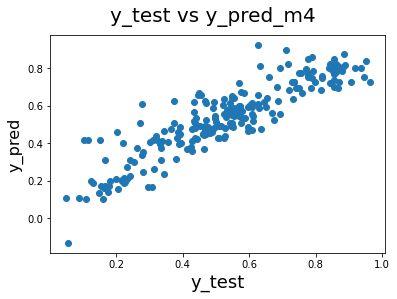

In [98]:

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred_m4', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [95]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [99]:
print(r2_score(y_test,y_pred_m4))

0.7996987946396734


model will be following for this

 Y= 0.4277 + (0.2301 * yr) +  (0.4480 * temp) + (-0.2412 * hum) + (-0.2066 * windspeed) + (-0.1867*weathersit_c)+(-0.1487 * season_spring) + (-0.0901 * mnth_july)

#### Conclusion:

1. for every increase in temp by 0.4480 there is increase in count of bike sharing

2. when there is decrease in humidity by .24 unit there is unit increase in count 

3. with decrease in windspeed by .21 unit there  there is unit increase in count 